   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None 

          user_id         age country  purchases      revenue
count   41.000000   39.000000      41  41.000000    41.000000
unique        NaN         NaN       5        NaN          NaN
top           NaN         NaN      RU        NaN          NaN
freq          NaN         NaN

/var/folders/5c/8lwyx2j12fl588m553zjwcth0000gn/T/ipykernel_27819/1707542486.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("age_group")["revenue"].mean())


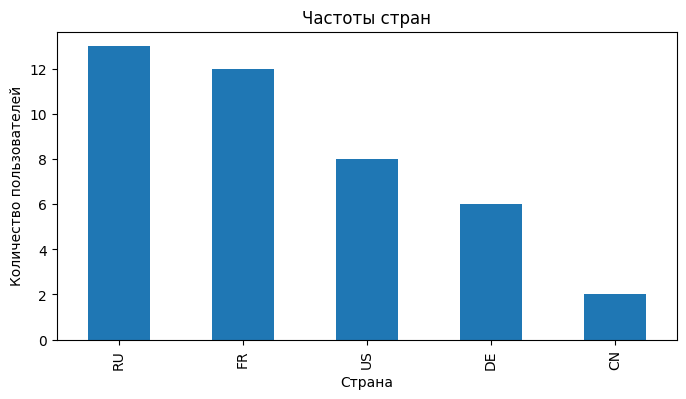

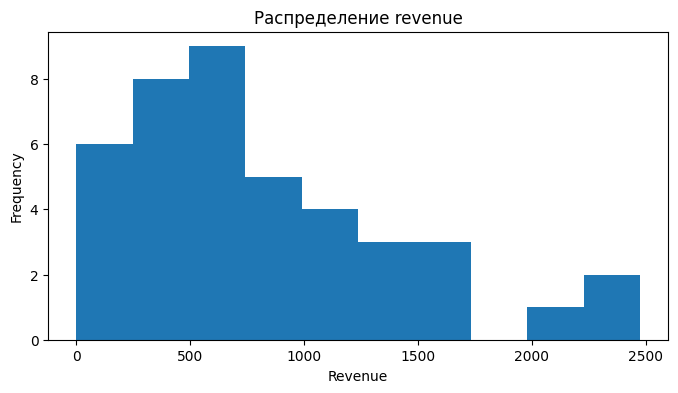

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")  # путь под себя

print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe(include='all'), "\n")
print(df.isna().mean(), "\n")
print("Количество дубликатов:", df.duplicated().sum(), "\n")


print("=== Аномалии: возраст < 0 или > 100 ===")
print(df[(df["age"] < 0) | (df["age"] > 100)], "\n")

print("=== Аномалии: purchases < 0 ===")
print(df[df["purchases"] < 0], "\n")

print("=== Аномалии: revenue < 0 ===")
print(df[df["revenue"] < 0], "\n")

print("=== Подозрение: revenue == 0 при purchases > 0 ===")
print(df[(df["purchases"] > 0) & (df["revenue"] == 0)], "\n")

print("Частоты стран")
print(df["country"].value_counts(), "\n")

print("Частоты стран (нормированные)")
print(df["country"].value_counts(normalize=True), "\n")

print("Средние и суммы по странам")
print(
    df.groupby("country")[["purchases", "revenue"]]
      .agg(["mean", "sum", "min", "max"])
)

df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 25, 35, 50, 120],
    labels=["0–25", "26–35", "36–50", "50+"]
)

print("\nСредний revenue по возрастным группам")
print(df.groupby("age_group")["revenue"].mean())

plt.figure(figsize=(8,4))
df["country"].value_counts().plot(kind="bar")
plt.title("Частоты стран")
plt.xlabel("Страна")
plt.ylabel("Количество пользователей")
plt.show()

plt.figure(figsize=(8,4))
df["revenue"].plot(kind="hist", bins=10)
plt.title("Распределение revenue")
plt.xlabel("Revenue")
plt.show()
